## Introducción a Regresión Lineal
### Parte 1: Modelos Lineales Simples

Un modelo lineal simple consiste en una relación funcional entre dos variables reales $x$ y $y$ que tiene la forma:

$$y=f(x)=\beta_1x+\beta_0,$$

en donde $\beta_1$ se conoce como la **pendiente** y $\beta_0$ como el **intercepto** del modelo.

La célula siguiente permite explorar visualmente dicha relación en rangos diferentes para cada variable, y las anotaciones en la gráfica enfatizan la característica más importante de este tipo de modelos: el aumento en la variable $y$, $\Delta y$ relativo a una unidad de aumento en la varible $x$, $\Delta x$, siempre es el mismo, o bien, la derivada de $y$ respecto de $x$ siempre es constante.

In [ ]:
rm(list=ls())

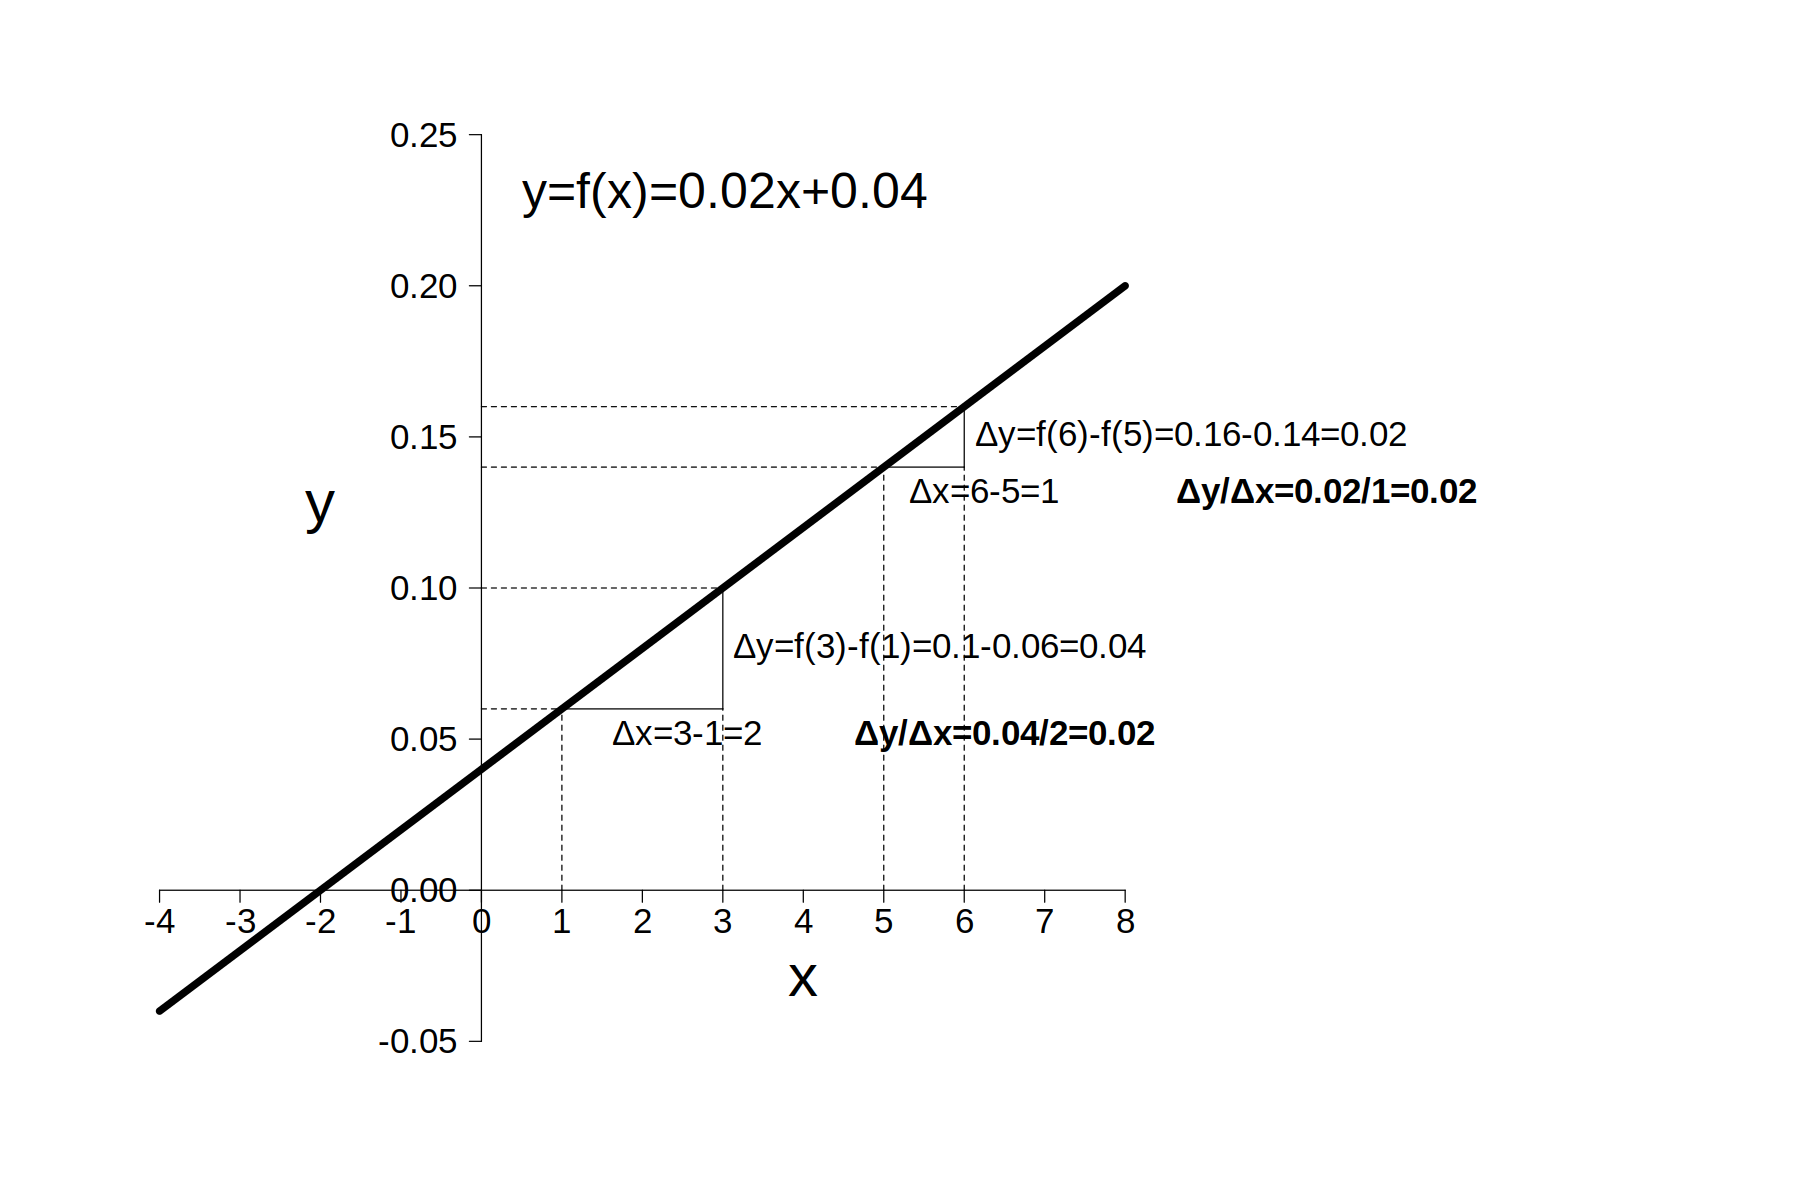

In [1]:
x <- seq(-4,8,length.out = 20)
slope <- 0.02
intercept <- 0.04
f_x <- function(x){
    return(x*slope+intercept)
}
y <- f_x(x)

options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)
segments(x0=c(1,3,5,6),x1=c(3,3,6,6),
        y0=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        y1=c(f_x(1),f_x(3),f_x(5),f_x(6)))
segments(x0=c(1,3,5,6),x1=c(1,3,5,6),
        y0=rep(0,4),y1=c(f_x(1),f_x(1),f_x(5),f_x(5)),
        lty='dashed')
segments(x0=rep(0,4),c(1,3,5,6),
        y0=c(f_x(1),f_x(3),f_x(5),f_x(6)),y1=c(f_x(1),f_x(3),f_x(5),f_x(6)),
         lty='dashed')
text(2,f_x(1),'\u0394x=3-1=2',cex=1.75,adj=c(0.2,1.5))
text(5,f_x(1),paste('\u0394y/\u0394x=',f_x(3)-f_x(1),'/','2=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(3,f_x(2),paste('\u0394y=f(3)-f(1)=',f_x(3),'-',f_x(1),'=',f_x(3)-f_x(1),sep=''),cex=1.75,adj=-0.025)
text(5.5,f_x(5),'\u0394x=6-5=1',cex=1.75,adj=c(0.1,1.5))
text(9,f_x(5),paste('\u0394y/\u0394x=',f_x(6)-f_x(5),'/','1=',slope,sep=''),cex=1.75,adj=c(0.1,1.5),font=2)
text(6,f_x(5.5),paste('\u0394y=f(6)-f(5)=',f_x(6),'-',f_x(5),'=',f_x(6)-f_x(5),sep=''),cex=1.75,adj=-0.025)
text(0.5,0.23,paste('y=f(x)=',slope,'x+',intercept,sep=''),cex=2.5,adj=0)
# Model
lines(x,y,lwd=6)

Los modelos lineales son una herramienta comúnmente empleada para intentar explicar la relación entre conjuntos de observaciones que parecen mostrar una relación sistemática (y lineal) "oculta" o "enmascarada" por ruido aleatorio. En el escenario más simple trabajamos únicamente con dos variables, $x$ y $y$, aunque estos modelos pueden extenderse para incluir varias variables independientes y dependientes al mismo tiempo.

Los supuestos centrales en la mayoría de dichos modelos probabilísticos, y en concreto del **Modelo de Regresión Lineal Simple**, son 1) que existe una relación lineal entre $x$ y **la media** de $y$, y 2) que la dispersión de las observaciones $y_i$ respecto de dicho modelo lineal puede ser descrita por una densidad Normal con dispersión constante respecto de $x$.

### Parte 2: Simulación

A continuación simulamos observaciones aleatorias desde un modelo con estas características, tanto para estudiar visualmente su comportamiento, como para mostrar cómo implementar el modelo en `JAGS` en un ejercicio de recuperación paramétrica.

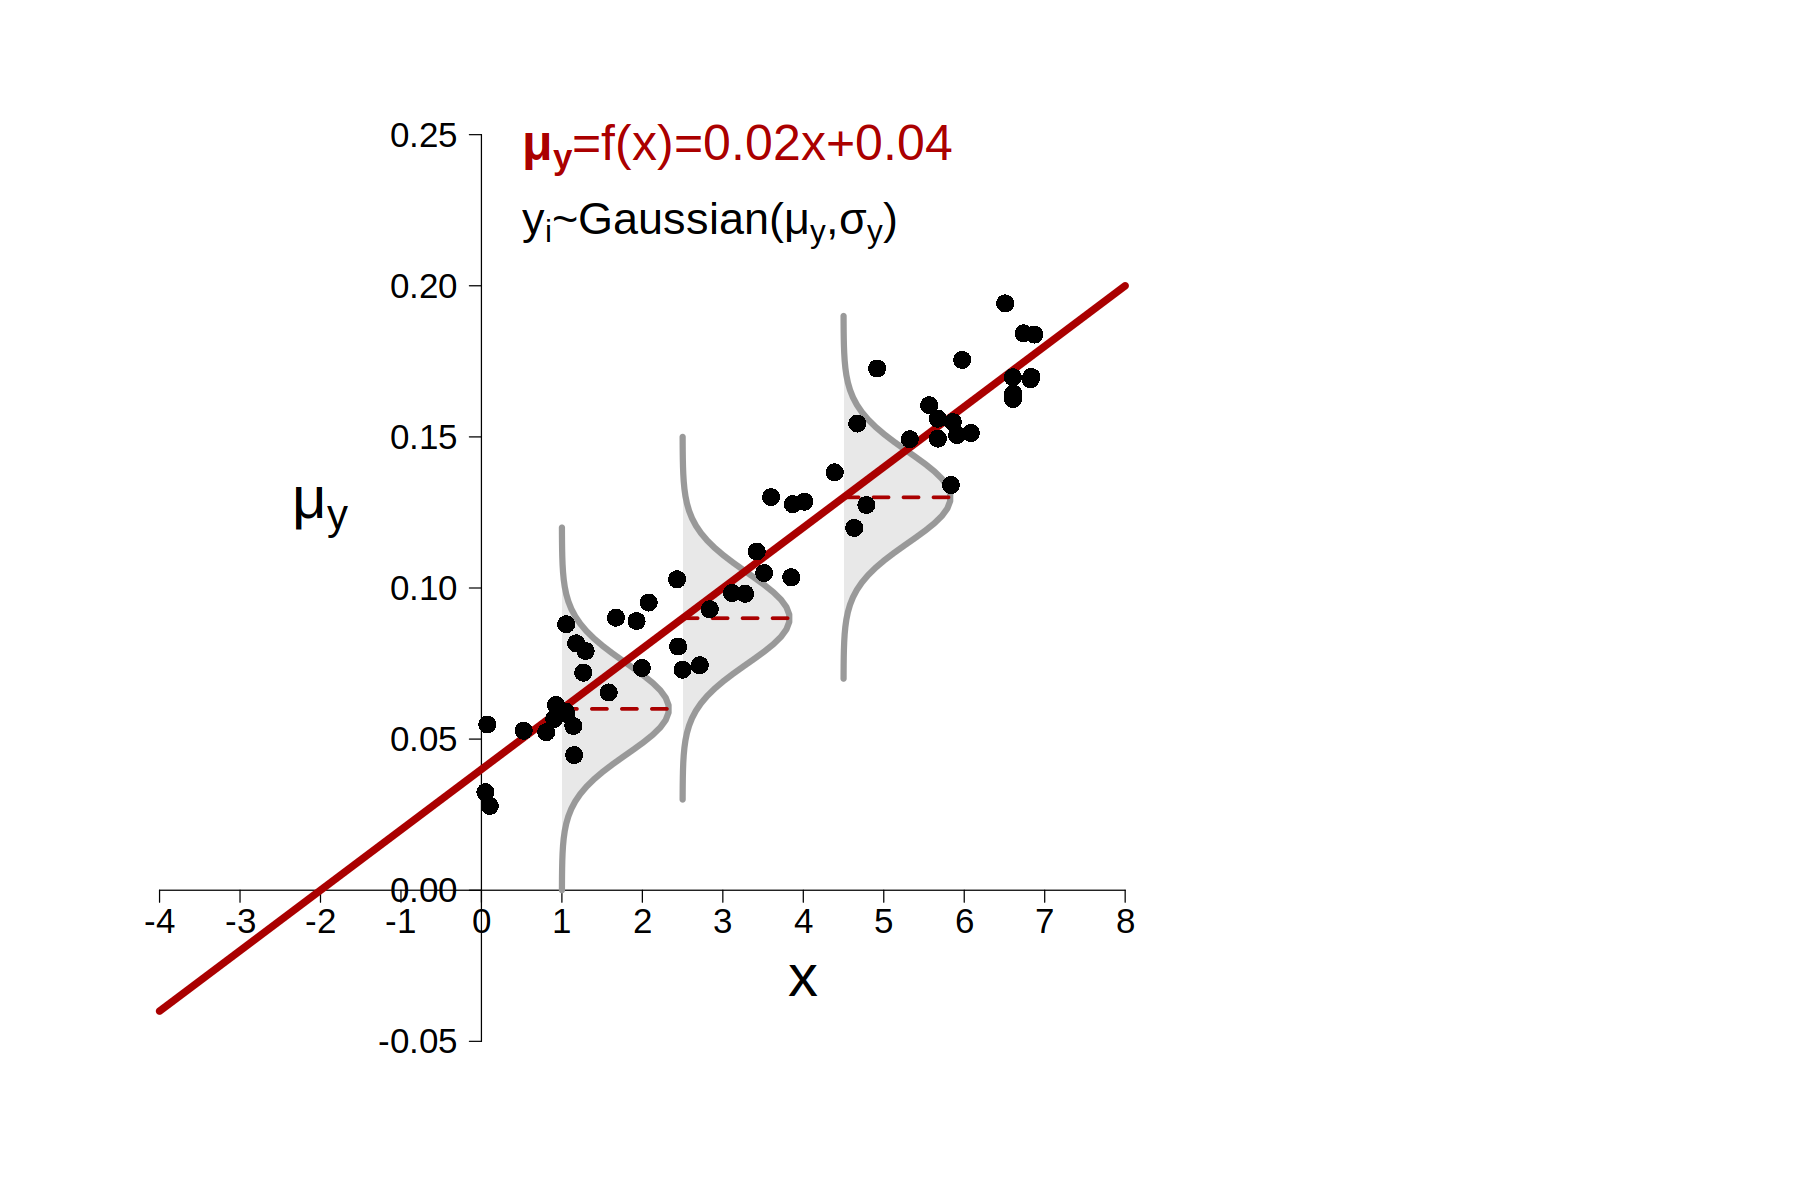

In [2]:
# Simulation
n_simul <- 55 # Number of data pairs to simulate
sd_y <- 0.015 # True STANDARD DEVIATION of Y
slope <- 0.02 # True SLOPE
intercept <- 0.04 # True INTERCEPT
f_x <- function(x){ # True relation between X and Mu_Y
    return(x*slope+intercept)
}
x <- seq(-4,8,length.out = 20)
mu_y <- f_x(x) 
set.seed(2) # Fixes 'random' replication
x_simul <- runif(n=n_simul,min = 0,max=7) # Simulating X values
y_simul <- rnorm(n=n_simul,mean=f_x(x_simul),sd=sd_y) # Simulating Y values

# Plotting
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
# Canvas
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
# Add axes and axes labels
axis(1,pos=0,cex.axis=1.75,at=-4:8)
axis(2,pos=0,las=2,cex.axis=1.75)
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)
# Add normal curves
for(x_i in c(1,2.5,4.5)){
    y_range <- f_x(x_i)+c(-0.06,0.06)
    y_plot <- seq(y_range[1],y_range[2],length.out = 50)
    y_dens <- dnorm(y_plot,mean=f_x(x_i),sd=sd_y)*0.05+x_i
    polygon(x = c(head(y_dens,1),y_dens,tail(y_dens,1)),
           y=c(x_i,y_plot,x_i),
           col='#cccccc74',border=NA)
    lines(y_dens,y_plot,lwd=5,col='#999999')
    lines(x=c(x_i,x_i+dnorm(f_x(x_i),mean=f_x(x_i),sd=sd_y)*0.05),
         y=rep(f_x(x_i),2),lwd=3,lty='dashed',col='#aa0000')
}
# Add model line
lines(x,mu_y,lwd=6,col='#aa0000')
# Add simulated data
points(x_simul,y_simul,pch=16,cex=2)
# Add model equations
text(0.5,0.245,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa0000')
text(0.5,0.22,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=2.25,adj=0)


### Parte 3: Inferencia y Recuperación de Parámetros

En las células siguientes implementamos el modelo en `JAGS` y graficamos los resultados del algortimo. Noten que lo único a lo que `JAGS` tiene acceso son los pares de observaciones $(x_i,y_i)$, pero no conoce los valores verdaderos de la **pendiente**, ni del **intercepto**, ni de la **dispersión** de $y_i$ que generaron las observaciones. En cambio, el algoritmo sólo conoce cierta incertidumbre inicial sobre dichos parámetros, que haremos explícita en el ejemplo siguiente:

$$\beta_1\sim Gaussian(\mu=0, \sigma=1/\sqrt{1000})$$ 

$$\beta_0\sim Uniform(0, 0.15)$$ 

$$\sigma_y\sim Uniform(0, 0.20)$$

$$\mu_{y_{i}}|\beta_1, \beta_0,x_i\leftarrow \beta_1 x_i+\beta_0$$

$$y_{i}|\mu_{y{i}}, \sigma_y\sim Gaussian(\mu_{y_{i}}, \sigma_y),$$

en donde $y_i$ y $x_i$ son las únicas variables observadas.

In [46]:
# Model
write('model{

slope_post~dnorm(0,1000) # T(,0.01) # Remember Gaussian dispersion scales PRECISION
slope_prior~dnorm(0,1000) # T(,0.01) # Awas con las restricciones de valores
intercept_post~dunif(0,0.15)
intercept_prior~dunif(0,0.15)
sd_y_post~dunif(0,0.20)
sd_y_prior~dunif(0,0.20)
tau_y_post <- 1/sd_y_post^2
tau_y_prior <- 1/sd_y_prior^2
for(i in 1:n_obs){
    mu_y_post[i] <- x_simul[i]*slope_post+intercept_post
    mu_y_prior[i] <- x_simul[i]*slope_prior+intercept_prior
    y_simul[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_post[i]~dnorm(mu_y_post[i],tau_y_post)
    y_pred_prior[i]~dnorm(mu_y_prior[i],tau_y_prior)
}

}','simple_linear_regression.bug')

# Observed
n_obs <- length(x_simul)
data_jags <- list('x_simul','y_simul','n_obs') # 'x_simul' and 'y_simul' were "filled" in previous cell

# Unobserved
unobs <- c('slope_post','slope_prior',
          'intercept_post','intercept_prior',
          'sd_y_post','sd_y_prior',
          'mu_y_post','mu_y_prior',
          'y_pred_post','y_pred_prior')

# Inference
library('R2jags')
bayes <- jags(data=data_jags,
             parameters.to.save=unobs,
             model.file='simple_linear_regression.bug',
             n.iter=30000,
             n.burnin=6000,
             n.thin=3)
nds <- bayes$BUGSoutput$sims.list

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 55
   Unobserved stochastic nodes: 116
   Total graph size: 457

Initializing model



In [47]:
# Examine 'bayes': emphasize the number of unobserved against the number of observed.
#bayes
bayes$BUGSoutput$summary

,mean,sd,2.5%,25%,50%,75%,97.5%,Rhat,n.eff
deviance,-323.35843476,2.595940113,-3.262875e+02,-325.26396468,-324.03723561,-322.16975663,-316.59774302,1.001540,3300
intercept_post,0.04154431,0.003321728,3.507181e-02,0.03933579,0.04154030,0.04375604,0.04810052,1.001495,3600
intercept_prior,0.07478134,0.043348172,3.882197e-03,0.03716149,0.07477143,0.11231598,0.14622608,1.000952,24000
mu_y_post[1],0.06728305,0.002508802,6.236150e-02,0.06562070,0.06728775,0.06895574,0.07226962,1.001399,4300
mu_y_post[2],0.13932665,0.002098570,1.352264e-01,0.13794241,0.13931862,0.14070058,0.14351426,1.001031,21000
mu_y_post[3],0.12136103,0.001818330,1.178043e-01,0.12014578,0.12135862,0.12256861,0.12493631,1.000949,24000
mu_y_post[4],0.06493998,0.002576245,5.989244e-02,0.06322836,0.06494623,0.06665685,0.07005867,1.001413,4200
mu_y_post[5],0.17294270,0.003042726,1.669446e-01,0.17093776,0.17293760,0.17493325,0.17897279,1.001254,6300
mu_y_post[6],0.17289197,0.003041070,1.668982e-01,0.17088886,0.17288632,0.17488158,0.17891626,1.001254,6300
mu_y_post[7],0.05952542,0.002738135,5.415630e-02,0.05771560,0.05953365,0.06133898,0.06498092,1.001441,4000


### Plotting Model Results

#### Posterior Predictive

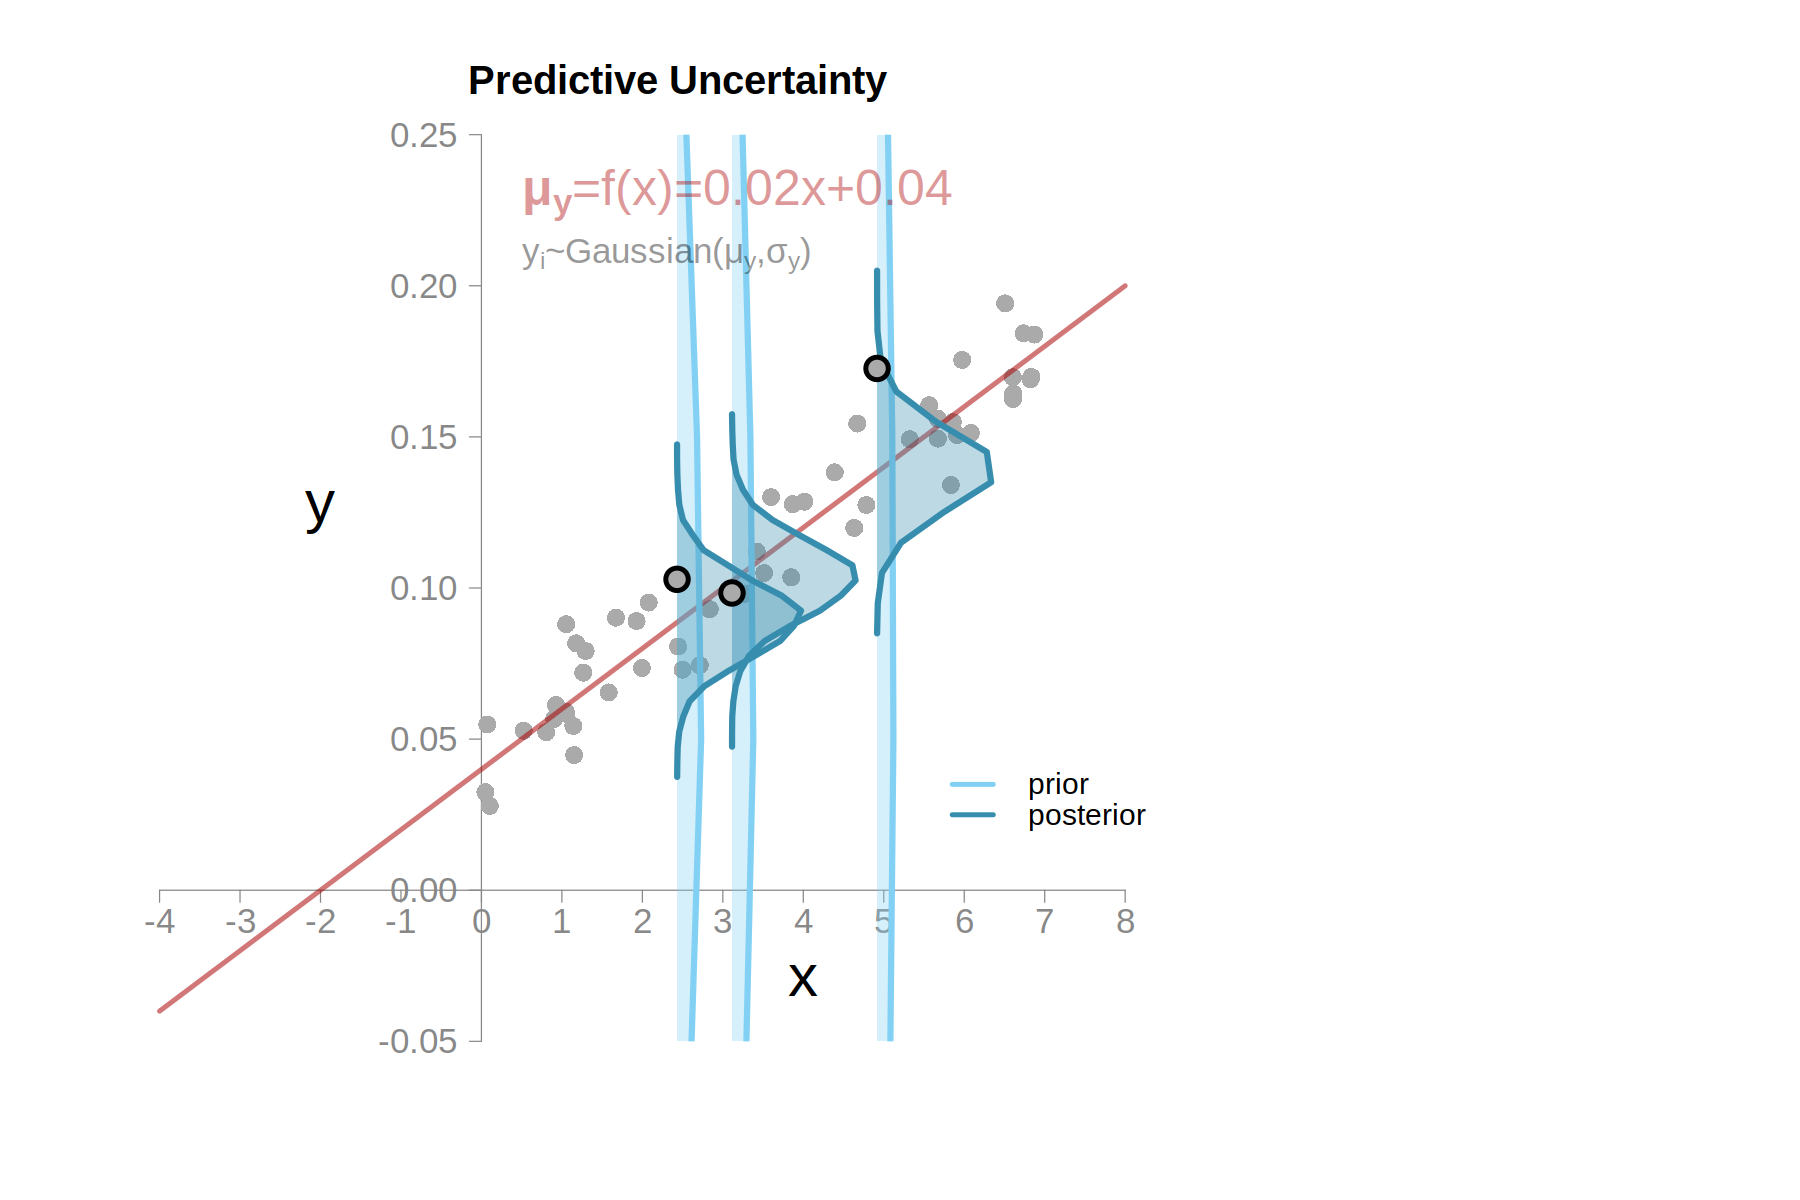

In [48]:
# POSTERIOR PREDICTIVE (pt.1)

# Colors (to be used in all graphs)
col_prior <- '#82d1f4' 
col_post <- '#378dae'
col_axis <- '#710c9e'

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
#index <- 1:length(x_simul)
clip(-10,10,-.05,.25)
for(i in index){
    # Extracting data from JAGS
    ht_y_pred_prior <- hist(nds$y_pred_prior[,i],plot=F)
    ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_y_pred_post$mids
    y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
    y_plot_prior <- ht_y_pred_prior$mids
    y_dens_prior <- ht_y_pred_prior$density*0.1+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=col_prior)
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}
# Add corresponding simulated observations
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Predictive Uncertainty',3,cex=2,adj=0.3,font=2)

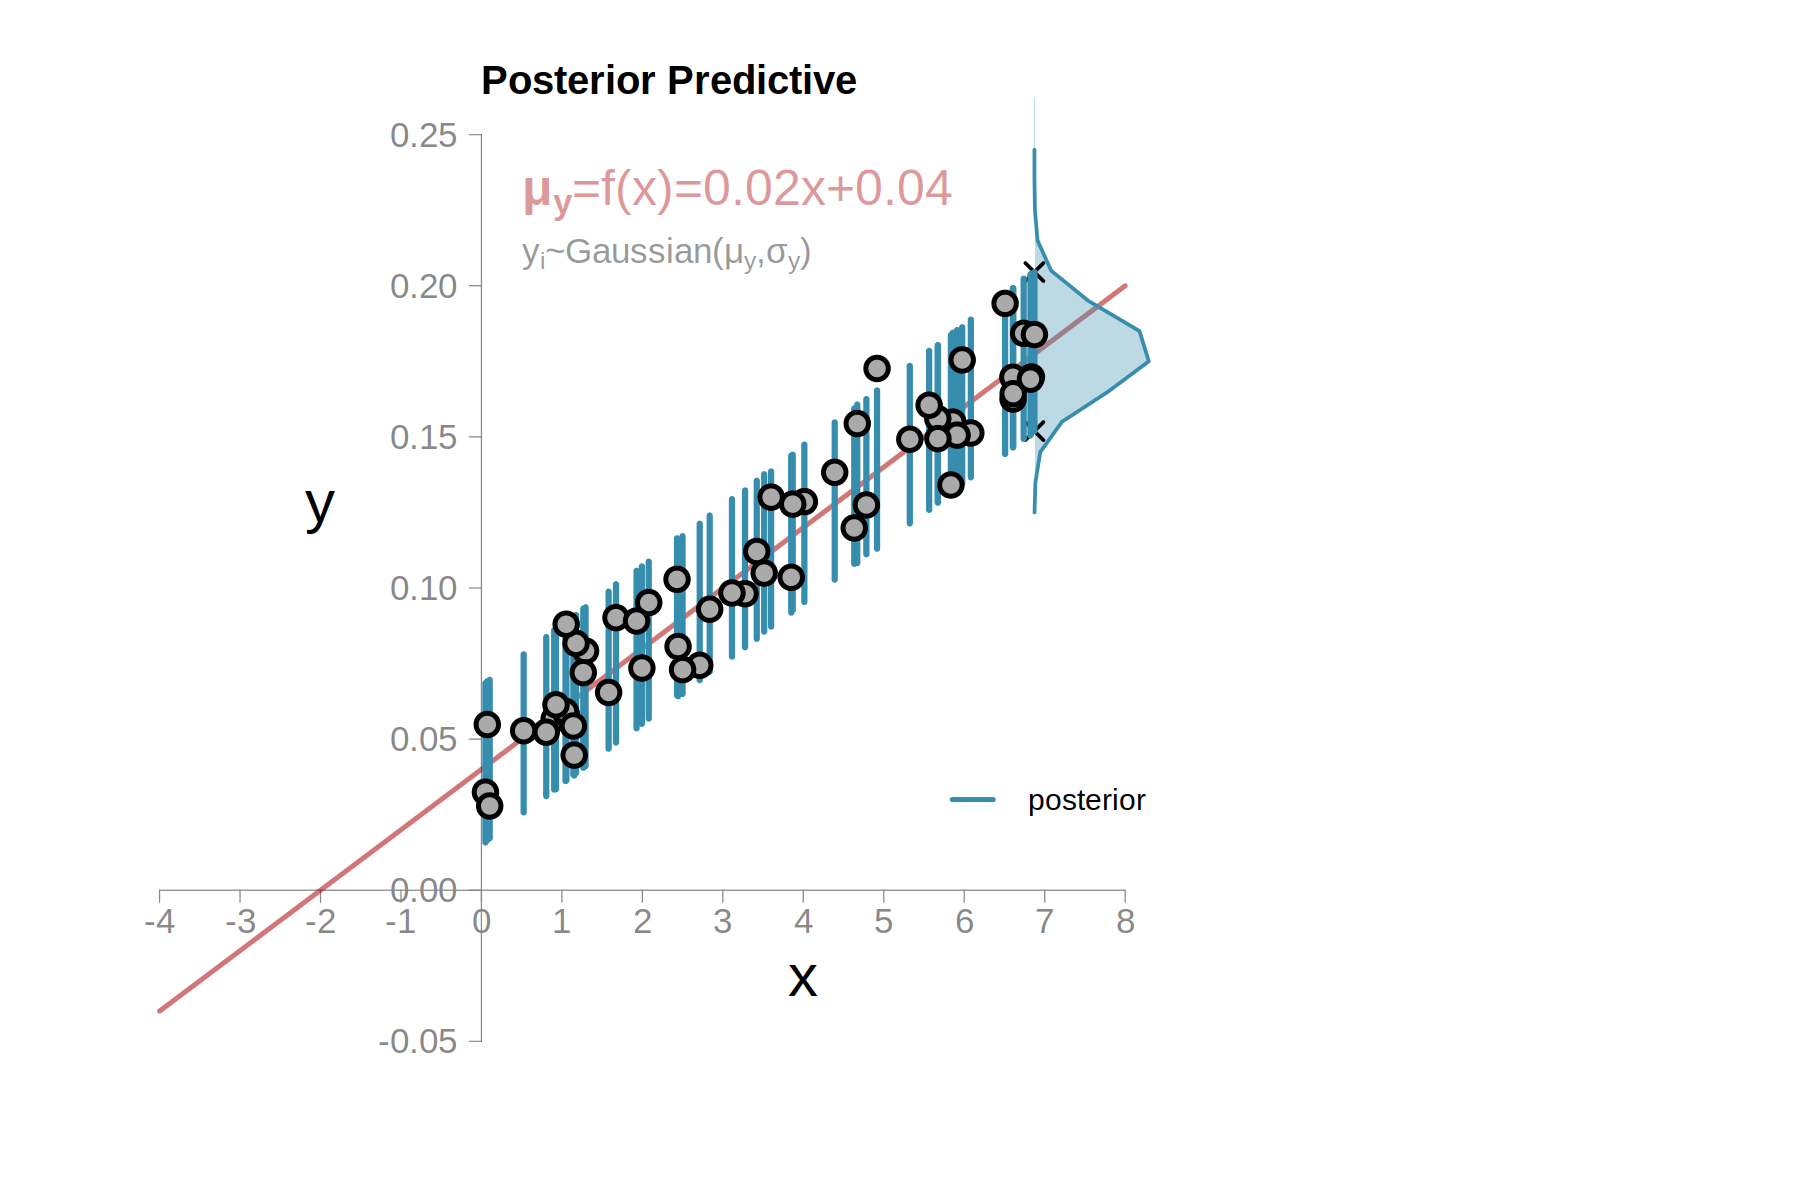

In [49]:
# POSTERIOR PREDICTIVE (pt.2, full)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# True Model
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_y_pred_post <- hist(nds$y_pred_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_y_pred_post$mids
y_dens_post <- ht_y_pred_post$density*0.05+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$y_pred_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Data
points(x_simul,y_simul,lwd=4,cex=2.5,pch=21,bg='#aaaaaa')

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext('Posterior Predictive',3,cex=2,adj=0.3,font=2)

#### Uncertainty over Slope and Intercept

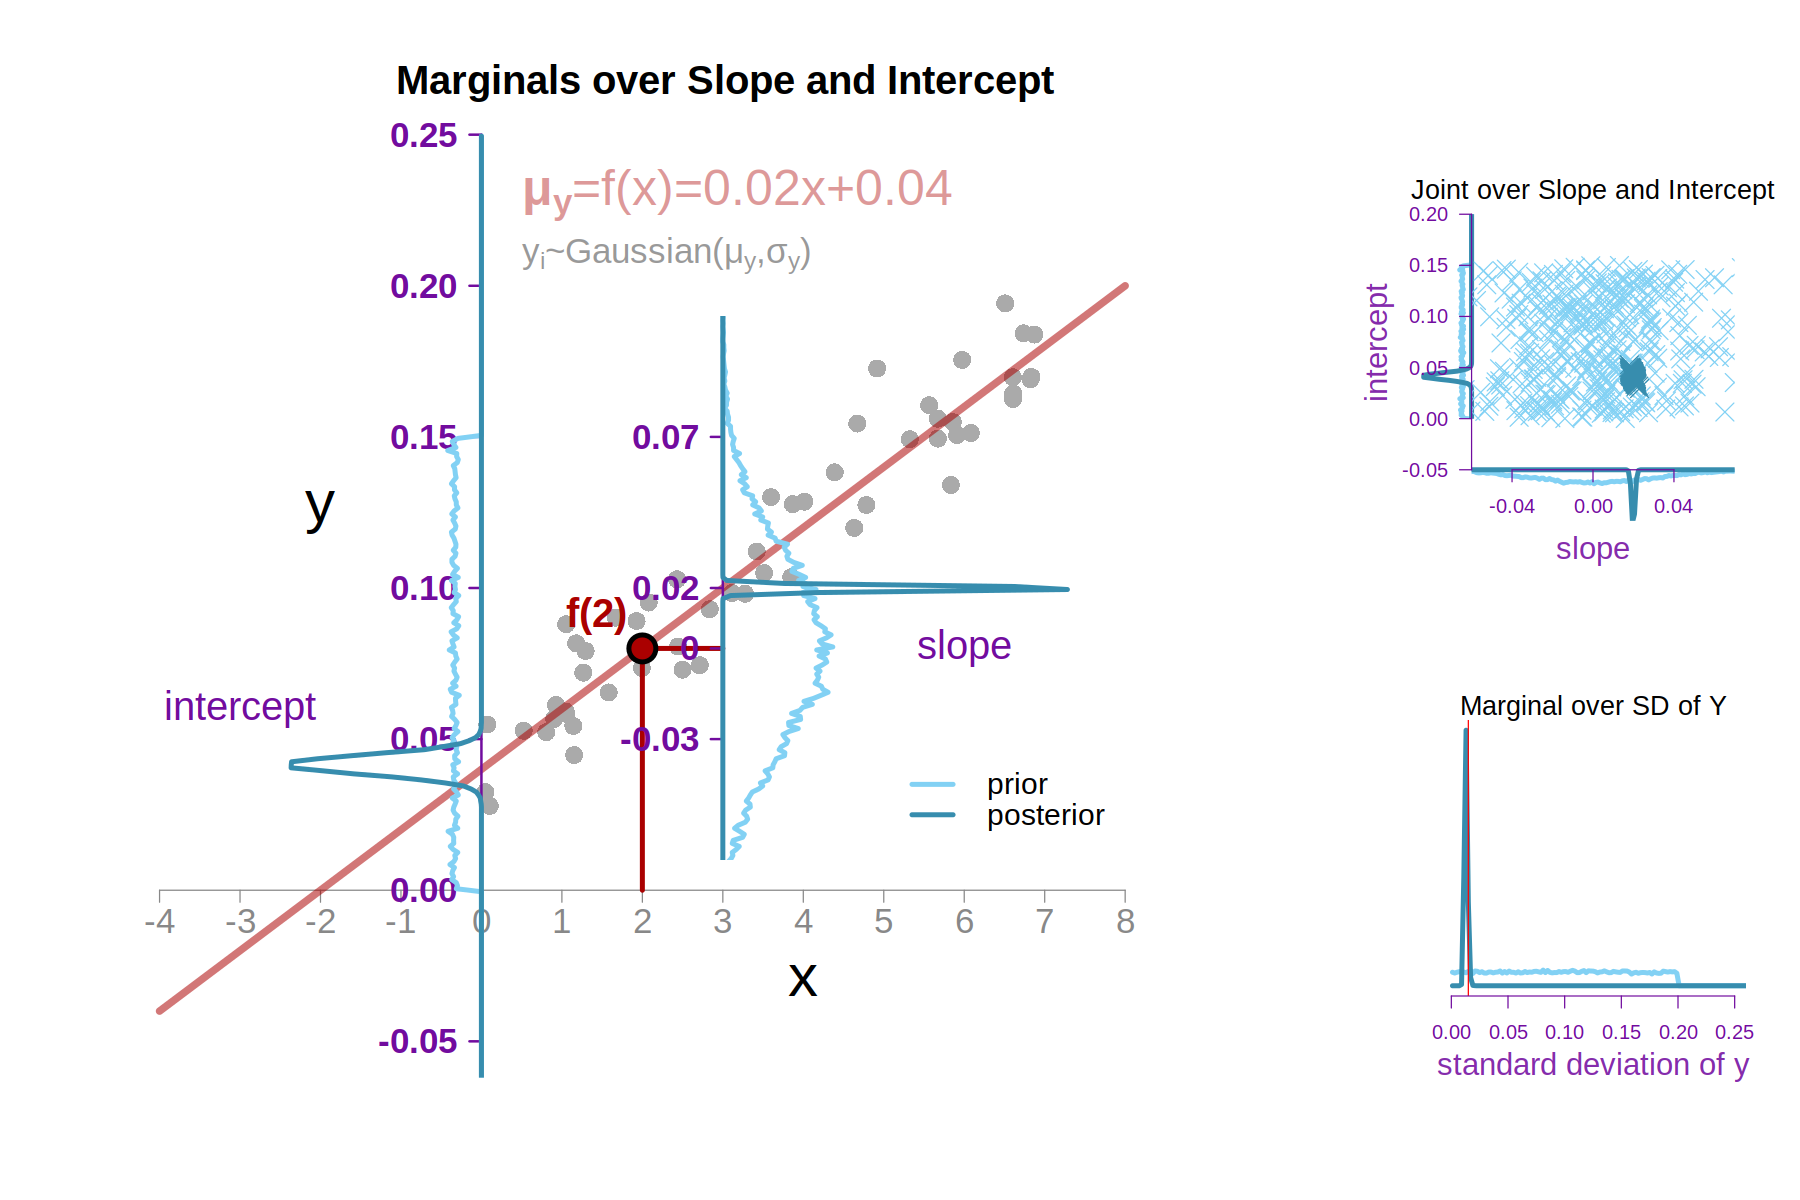

In [50]:
# Uncertainty over SLOPE, INTERCEPT, and DISPERSION of Y

# Information about uncertainty from JAGS
hist(nds$intercept_post,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_post
hist(nds$intercept_prior,breaks=seq(-.25,.25,0.001),plot=F)->ht_int_prior
hist(nds$slope_post,breaks=seq(-30,30,0.001),plot=F)->ht_slp_post
hist(nds$slope_prior,breaks=seq(-30,30,0.001),plot=F)->ht_slp_prior

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
# True model
lines(x,y,lwd=6,col='#aa000088')

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Plotting uncertainty over INTERCEPT
axis(2,pos=0,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
lines(ht_int_prior$density*-.05,ht_int_prior$mids,lwd=4,col=col_prior)
lines(ht_int_post$density*-.02,ht_int_post$mids,lwd=4,col=col_post)
text(-3,0.06,'intercept',cex=2,col=col_axis)

# Plotting uncertainty over SLOPE
segments(x0=c(2,2),x1=c(2,3),y0=c(0,f_x(2)),y1=rep(f_x(2),2),lwd=4,lty='solid',col='#aa0000')
points(2,f_x(2),pch=21,cex=3,bg='#aa0000',lwd=4)
text(2,f_x(2),'f(2)',adj=c(1.25,-.75),cex=2,font=2,col='#aa0000')
axis(2,at=c(f_x(2),seq(from=0.05,to=.15,by=.05)),
     labels=c(f_x(2),seq(from=0.05,to=.15,by=.05))-f_x(2),
     pos=3,las=2,cex.axis=1.75,font=2,lwd=2,col=col_axis,col.axis=col_axis)
clip(1,15,.01,.19)
lines(ht_slp_prior$density*.1+3,ht_slp_prior$mids+f_x(2),lwd=4,col=col_prior)
lines(ht_slp_post$density*.01+3,ht_slp_post$mids+f_x(2),lwd=4,col=col_post)
text(6,f_x(2),'slope',cex=2,col=col_axis)

# Legend
legend(4.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
      lwd=4)

# Main title
mtext('Marginals over Slope and Intercept',3,cex=2,adj=0.3,font=2)

# Plotting joint uncertainty over SLOPE and INTERCEPT
par(plt=c(.8,.97,.6,.83),new=T)
plot(NULL,xlim=c(-0.07,0.07),ylim=c(-0.05,.20),ann=F,axes=F)
index <- sample(1:dim(nds$slope_post)[1],size=400)
clip(-1,1,0,.20)
lines(-.06-ht_int_prior$density*.0007,ht_int_prior$mids,col=col_prior,lwd=4)
lines(-.06-ht_int_post$density*.0002,ht_int_post$mids,col=col_post,lwd=4)
clip(-.06,.07,-.1,.20)
lines(ht_slp_prior$mids,-.05-ht_slp_prior$density*.001,col=col_prior,lwd=4)
lines(ht_slp_post$mids,-.05-ht_slp_post$density*.00012,col=col_post,lwd=4)
points(nds$slope_prior[index],nds$intercept_prior[index],pch=4,col=col_prior,cex=2)
points(nds$slope_post[index],nds$intercept_post[index],pch=4,col=col_post,cex=2)
axis(1,pos=-0.05,at=seq(-0.04,0.04,0.04),col=col_axis,col.axis=col_axis)
axis(2,pos=-0.06,las=1,at=seq(-.05,.20,0.05),col=col_axis,col.axis=col_axis)
mtext('intercept',2,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2)
mtext('slope',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Joint over Slope and Intercept',3,cex=1.35)

# Plotting uncertainty over SD_Y
par(plt=c(.8,.97,.17,.4),new=T)
hist(nds$sd_y_post,breaks=seq(0,1,0.002),plot=F)->ht_sd_post
hist(nds$sd_y_prior,breaks=seq(0,1,0.002),plot=F)->ht_sd_prior
plot(NULL,xlim=c(0,0.25),ylim=c(0,max(max(ht_sd_prior$density),max(ht_sd_post$density))),ann=F,axes=F)
lines(ht_sd_prior$mids,ht_sd_prior$density*3,col=col_prior,lwd=4)
lines(ht_sd_post$mids,ht_sd_post$density,col=col_post,lwd=4)
abline(v = sd_y, col = "red")
axis(1,col=col_axis,col.axis=col_axis)
mtext('standard deviation of y',1,cex=1.55,col=paste(col_axis,'dd',sep=''),line=2.5)
mtext('Marginal over SD of Y',3,cex=1.35)

#### Uncertainty over $\mu_y$

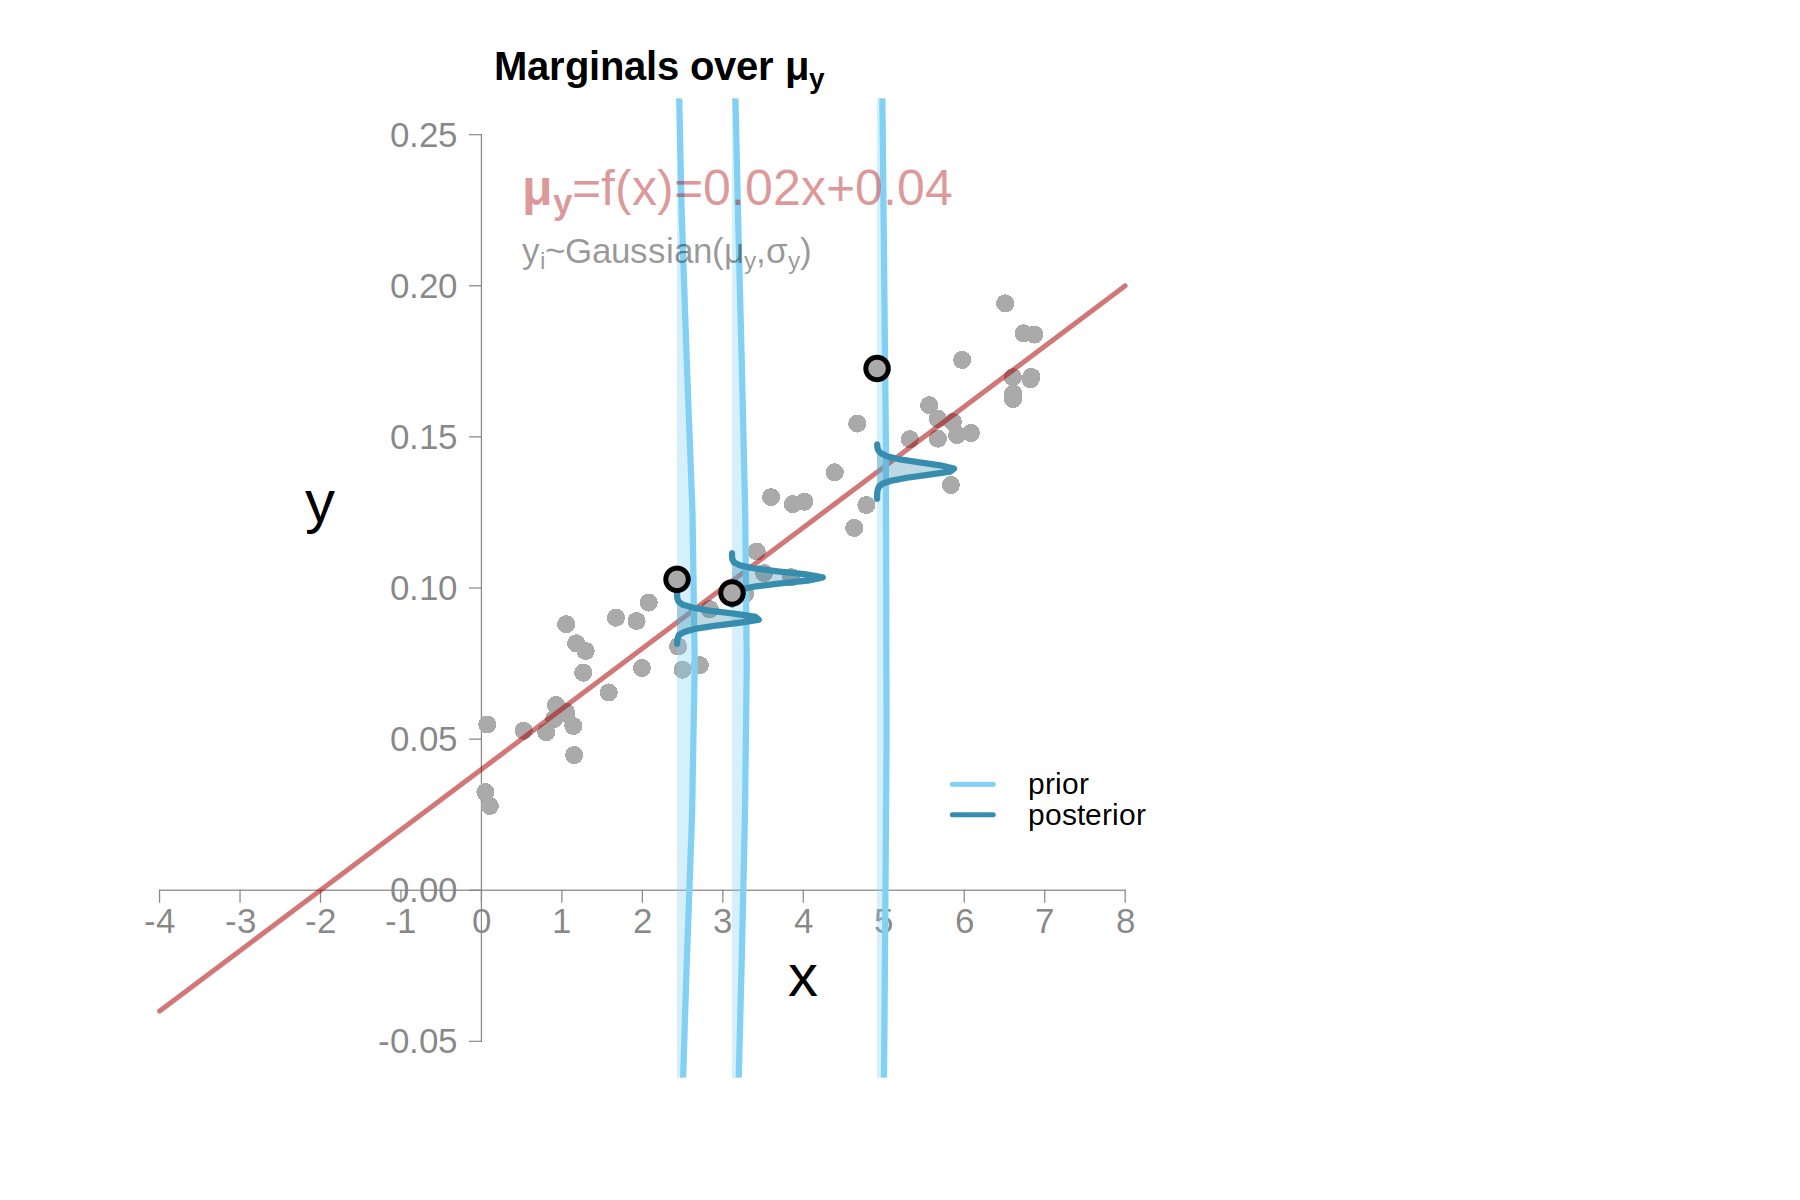

In [51]:
# Uncertainty over MU_Y (pt.1)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Selected observations
index <- c(2,19,25)
for(i in index){
    # Extracting data from JAGS
    ht_mu_y_prior <- hist(nds$mu_y_prior[,i],plot=F)
    ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
    # Rescaling and positioning with respect to X
    y_plot_post <- ht_mu_y_post$mids
    y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
    y_plot_prior <- ht_mu_y_prior$mids
    y_dens_prior <- ht_mu_y_prior$density*0.05+x_simul[i]
    # Plotting Prior over Mu_Y[i]
    polygon(x = c(head(y_dens_prior,1),y_dens_prior,tail(y_dens_prior,1)),
           y=c(x_simul[i],y_plot_prior,x_simul[i]),
           col=paste(col_prior,'55',sep=''),border=NA)
    lines(y_dens_prior,y_plot_prior,lwd=5,col=col_prior)
    # Plotting Posterior over Mu_Y[i]
    polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
           y=c(x_simul[i],y_plot_post,x_simul[i]),
           col=paste(col_post,'55',sep=''),border=NA)
    lines(y_dens_post,y_plot_post,lwd=5,col=col_post)
}

# Add corresponding simulated observation
points(x_simul[index],y_simul[index],lwd=4,cex=2.5,bg='#aaaaaa',pch=21)

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)

# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

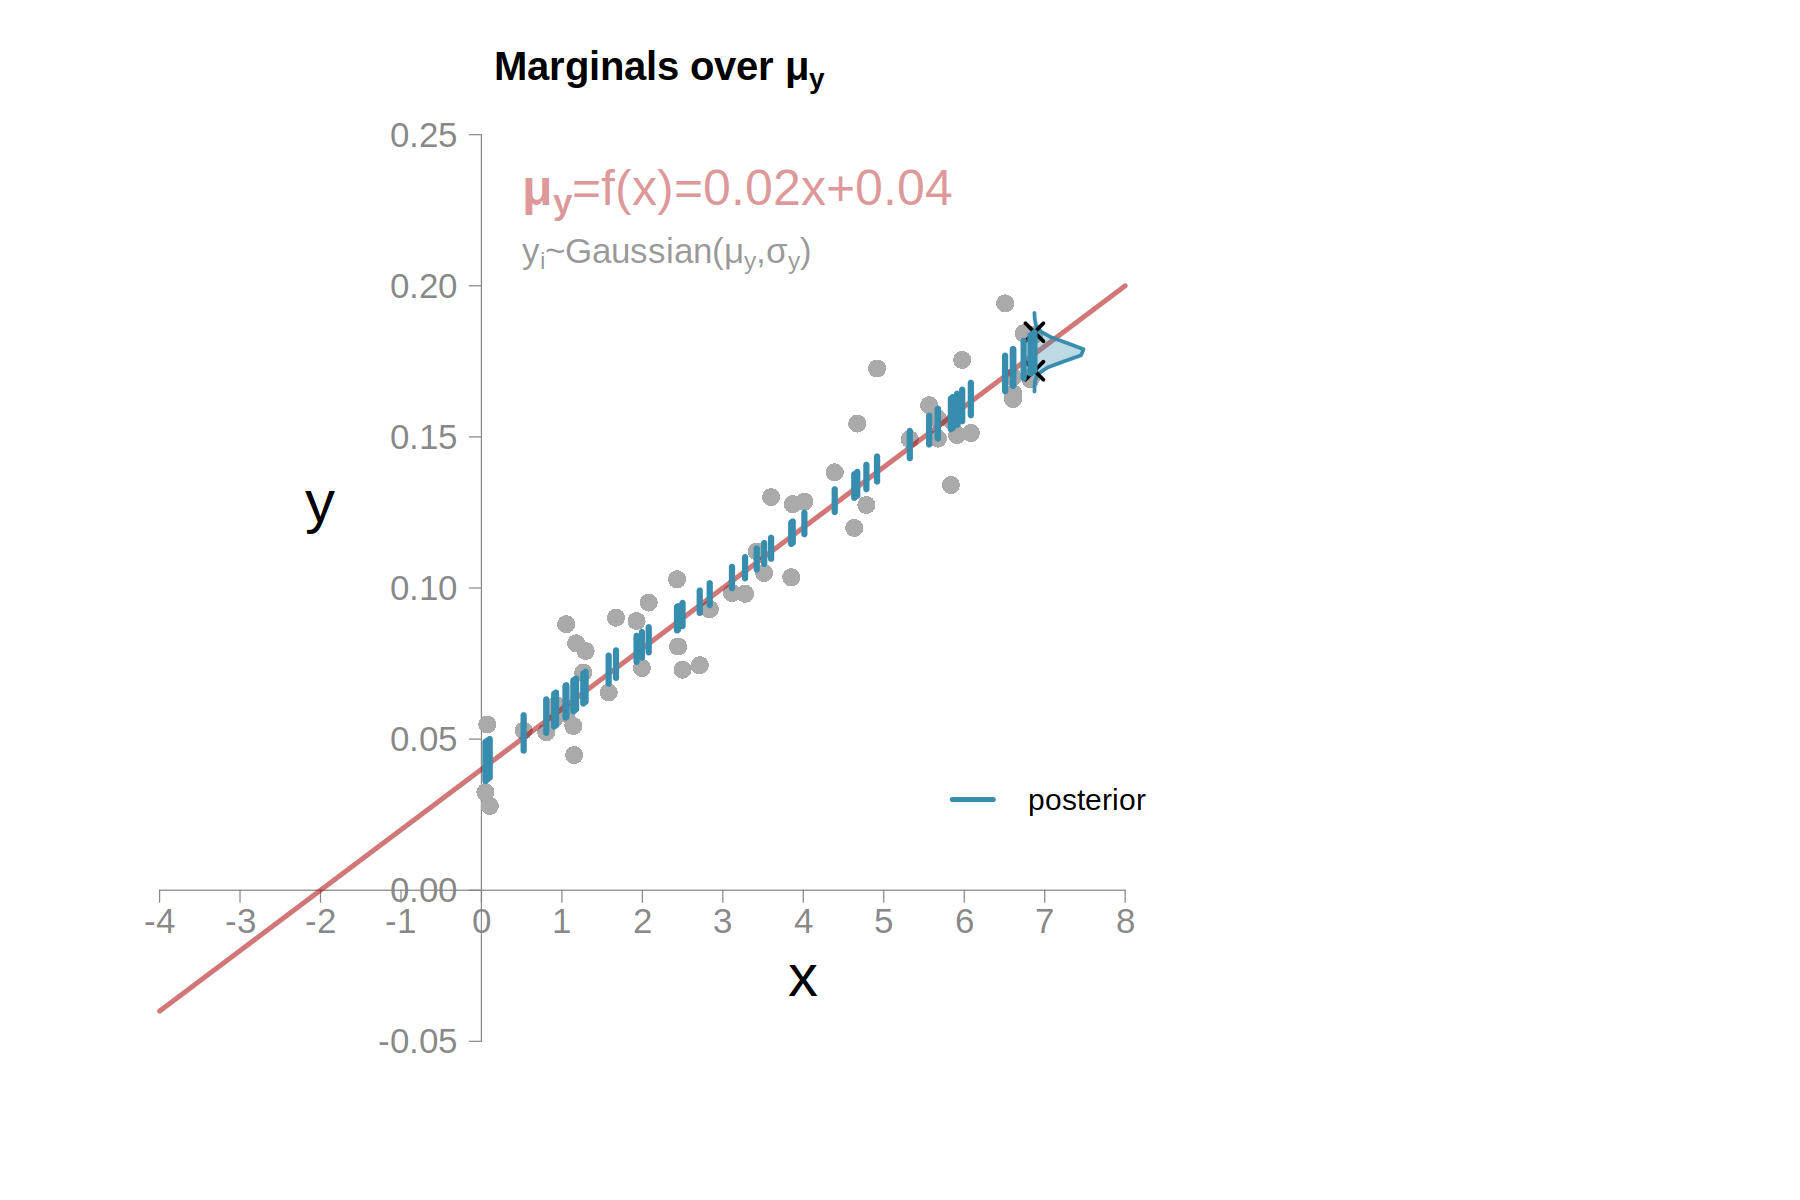

In [52]:
# Uncertainty over MU_Y (pt.2)

# Canvas
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,'y',cex=3)

# Data
points(x_simul,y_simul,pch=16,cex=2,col='#AAAAAA')
lines(x,y,lwd=4,col='#aa000088')

# Add example observation
i <- which.max(x_simul)
# Extracting data from JAGS
ht_mu_y_post <- hist(nds$mu_y_post[,i],plot=F)
# Rescaling and positioning with respect to X
y_plot_post <- ht_mu_y_post$mids
y_dens_post <- ht_mu_y_post$density*0.005+x_simul[i]
# Plotting Posterior over Mu_Y[i]
polygon(x = c(head(y_dens_post,1),y_dens_post,tail(y_dens_post,1)),
        y=c(x_simul[i],y_plot_post,x_simul[i]),
        col=paste(col_post,'55',sep=''),border=NA)
lines(y_dens_post,y_plot_post,lwd=3,col=col_post)
# Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
# ...and plot them
points(rep(x_simul[i],2),y_range,lwd=3,cex=2,pch=4)

# Selected observations
index <- c(2,19,25)
index <- 1:length(x_simul)
for(i in index){
    # Find the values of Mu_Y[i] where the Posterior accumulates 2.5% and 97.5%...
    y_range <- quantile(nds$mu_y_post[,i],prob=c(0.025,0.975))
    # ...and plot them
    lines(rep(x_simul[i],2),y_range,lwd=5,col=col_post)
}

# Model labels
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(5,0.03,yjust=0.5,
      legend=c('posterior'),
      col=c(col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg=NA,
      lwd=4)
# Main title
mtext(bquote(bold(paste('Marginals over ','\u03bc'[y]))),3,cex=2,adj=0.3,font=2)

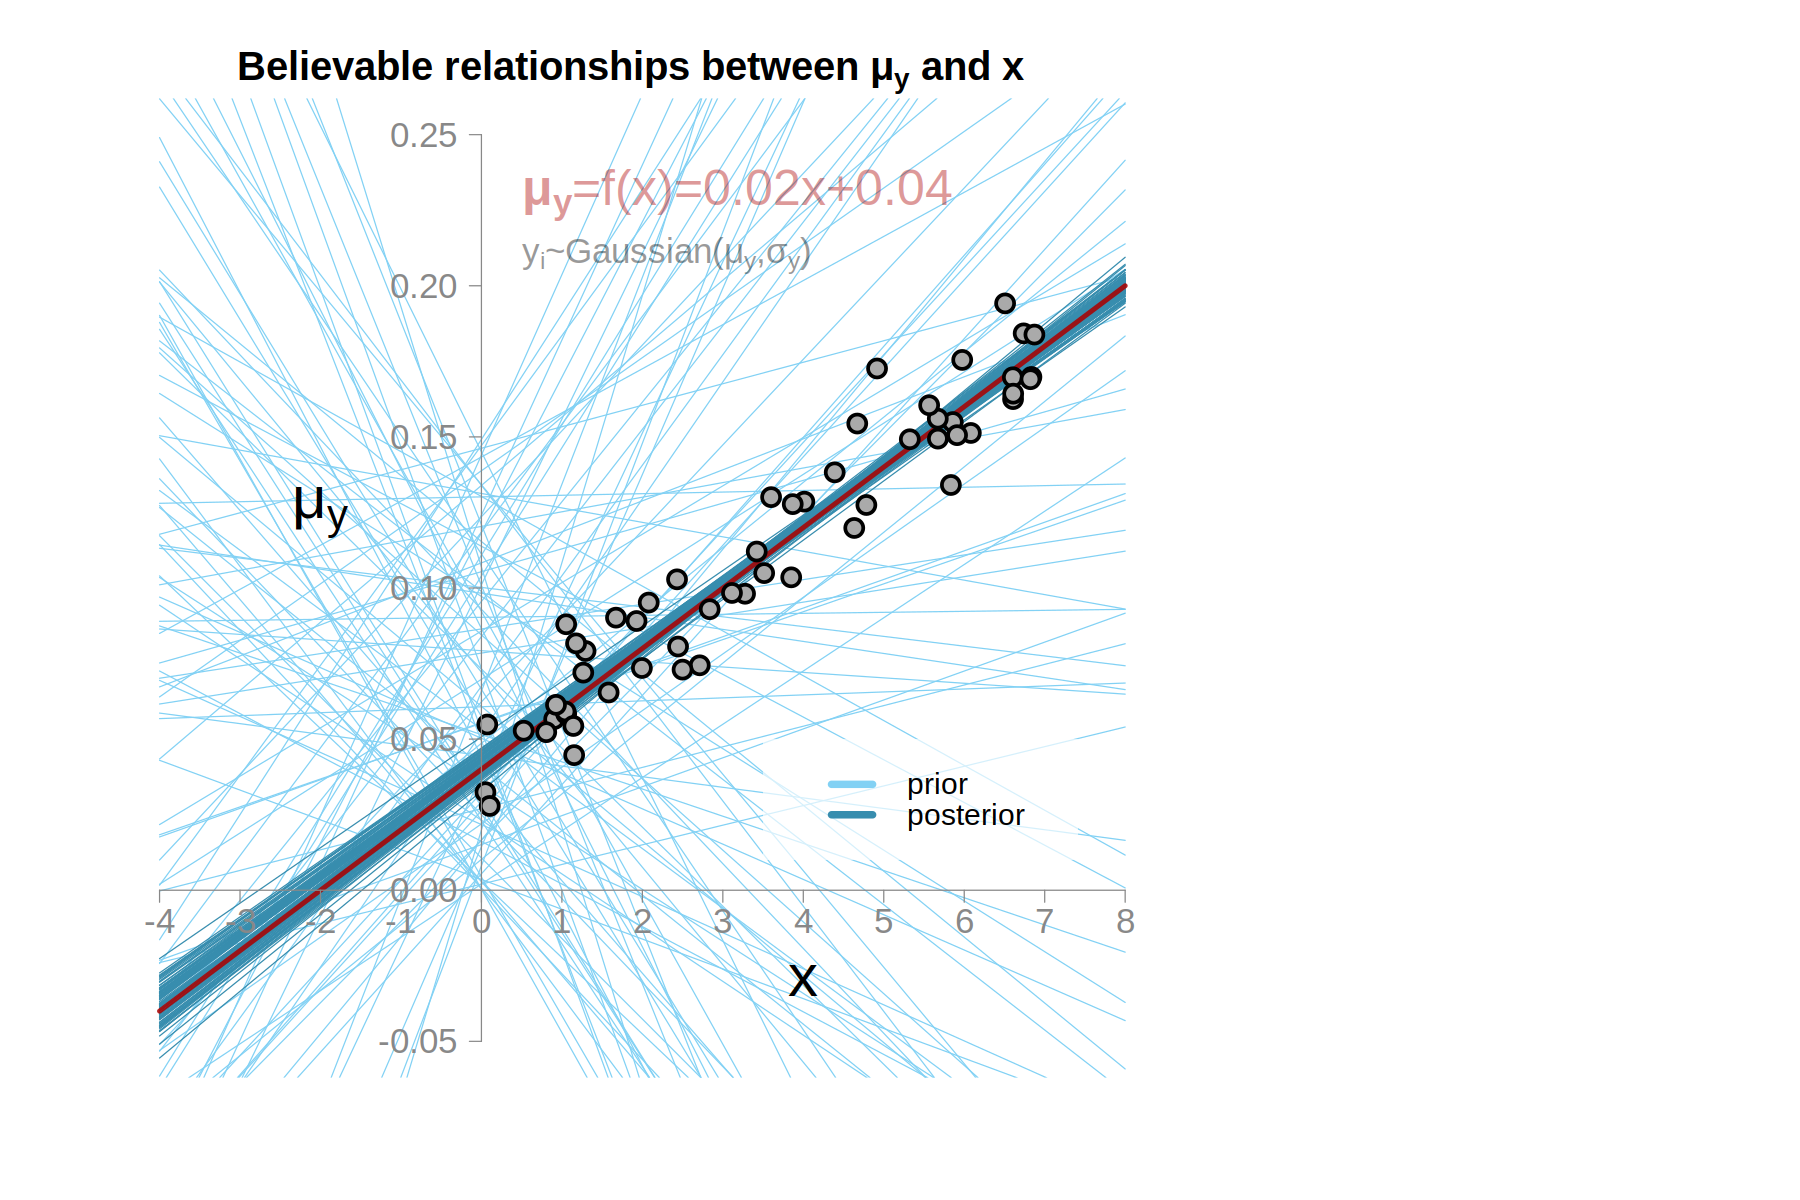

In [53]:
# Believable Lines

# Canvas (pt.1: base plot)
options(repr.plot.width = 15, repr.plot.height = 10) # Plot size in notebook
plot(NULL,xlim=c(-4,15),ylim=c(-0.05,0.25),axes=F,ann=F)

# Selected samples from JAGS
index <- sample(dim(nds$intercept_post)[1],size=100)
# Plotting prior lines
for(i in index){
    beta0_prior <- nds$intercept_prior[i]
    beta1_prior <- nds$slope_prior[i]
    y_believable_prior <- x*beta1_prior+beta0_prior
    lines(x,y_believable_prior,col=col_prior)
}
# Plotting posterior lines
for(i in index){
    beta0_post <- nds$intercept_post[i]
    beta1_post <- nds$slope_post[i]
    y_believable_post <- x*beta1_post+beta0_post
    lines(x,y_believable_post,col=col_post)
}

# True relationship
lines(x,y,lwd=4,col='#aa0000dd')
# Data
points(x_simul,y_simul,pch=21,lwd=3,cex=2,bg='#aaaaaa')

# Model equations
text(0.5,0.23,bquote(paste(bold('\u03BC'[y]),'=f(x)=',.(slope),'x+',.(intercept))),cex=2.5,adj=0,col='#aa000066')
text(0.5,0.21,bquote(paste('y'['i'],'~Gaussian(','\u03BC'[y],',\u03c3'[y],')')),cex=1.75,adj=0,col='#00000066')

# Legend
legend(3.5,0.03,yjust=0.5,
      legend=c('prior','posterior'),
      col=c(col_prior,col_post),
       seg.len=0.6,
       cex=1.5,
       x.intersp=0.5,
       y.intersp=0.5,
       box.lty='blank',
       bg='#ffffffaa',
       text.width=1.7,
      lwd=6)

# Main title
mtext(bquote(bold(paste('Believable relationships between ','\u03bc'[y],' and x',sep=''))),3,cex=2,adj=0.16,font=2)

# Canvas (pt.2: axes)
axis(1,pos=0,cex.axis=1.75,at=-4:8,col='#888888',col.axis='#888888')
axis(2,pos=0,las=2,cex.axis=1.75,col='#888888',col.axis='#888888')
text(4,-0.03,'x',cex=3)
text(-2,0.125,expression('\u03bc'[y]),cex=3)

### Ejercicios
El conjunto de observaciones `cycling.csv` contiene mediciones de `84 personas` sobre dos variables: el `número de minutos por día` que cada persona pedalea, y el `número de calorías por día` que cada persona consume.

El **diagrama de dispersión** de dichas observaciones sugiere que existe una relación lineal entre ellas, con cierto componente aleatorio.

Especifica el modelo en `JAGS` asumiendo una dispersión Gaussiana de las `calorías por día` respecto de esa relación lineal oculta, y responde las siguientes preguntas:

1. ¿Cuántas calorías se queman por cada minuto pedaleando?
2. ¿Cuántas calorías quema al día una persona que no pedalea?

In [54]:
rm(list=ls())

In [55]:
cycling <- read.csv('cycling.csv')
head(cycling)

,minutes_in_bike,calories_per_day
,<dbl>,<int>
1,52.5,2328
2,57.6,2415
3,50.5,2315
4,50.0,2303
5,57.0,2403
6,52.4,2317


In [56]:
dim(cycling)

[1] 84  2

In [57]:
nrow(cycling)

[1] 84

In [58]:
ncol(cycling)

[1] 2

In [59]:
summary(cycling)

 minutes_in_bike calories_per_day
 Min.   :36.40   Min.   :2135    
 1st Qu.:49.10   1st Qu.:2295    
 Median :52.55   Median :2342    
 Mean   :52.63   Mean   :2342    
 3rd Qu.:56.30   3rd Qu.:2392    
 Max.   :66.10   Max.   :2502    

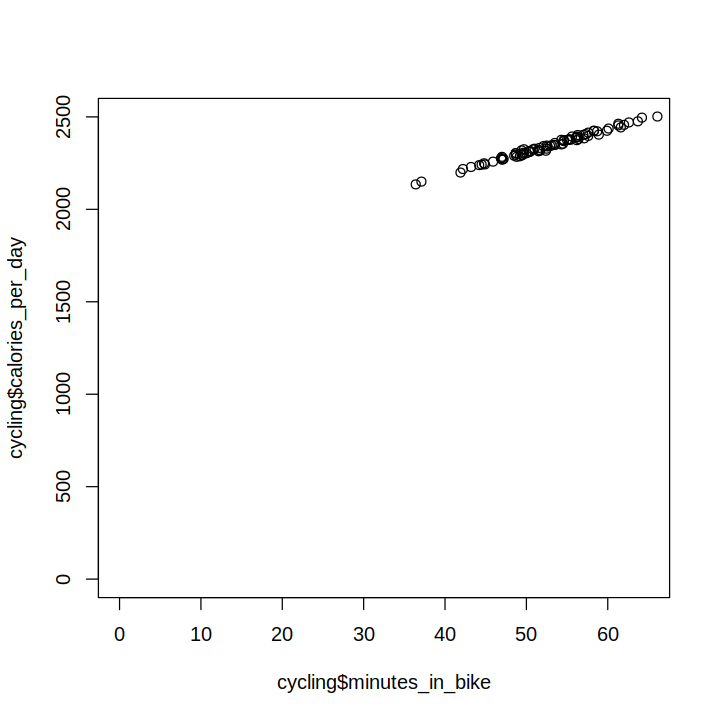

In [67]:
options(repr.plot.width = 6, repr.plot.height = 6) # Plot size in notebook
plot(cycling$minutes_in_bike,cycling$calories_per_day, xlim = c(0, 65), ylim = c(0, 2500))
# Intercepto prior limites entre 1500 y 2000